# Metodo Mccabe-Thiele

Librerias a utilizar:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Calculo de la curva de equilibrio:

In [3]:
alphaa=6.88
def y_alpha(x):
    return (alphaa*x)/(1+((alphaa-1)*x))

In [4]:
x_graph2=np.linspace(0,1,51)
y_graph2=y_alpha(x_graph2)

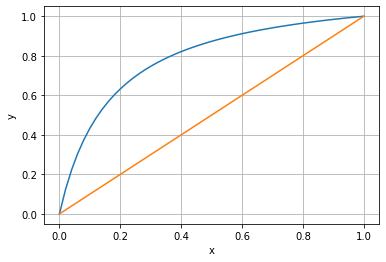

In [5]:
t=np.linspace(0,1,2)
plt.plot(x_graph2,y_graph2)
plt.plot(t)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

Valores de entrada necesarios

In [6]:
f=100   #Flujo de Entrada en kmol/h
xd=0.95 #Fracion del componente mas liviano en el tope
xb=0.03 #Fracion del componente mas liviano en el fondo
z=0.45  #Fraccion del mas liviano a la entrada
q=0.5   #Cantidad de vapor en la entrada
r_rmin=1.3

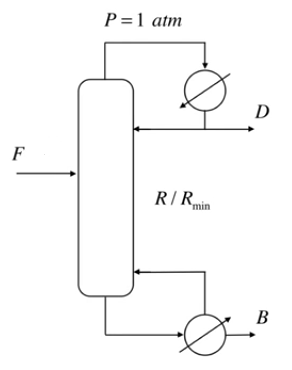

Con balance de masa, se determinara D y B con el siguiente sistema de ecuaciones:

F=D+B
Fz=Dxd+Bxb

In [7]:
A=np.array([[1,1],[xd,xb]])
B=np.array([100,45])
x=np.linalg.solve(A,B)
d=x[0]
b=x[1]
print(f"d= {round(d,2)}, b= {round(b,2)}")

d= 45.65, b= 54.35


Calculo del punto Pinch (q) sera con:

In [8]:
xp=round(((alphaa-1)*(z+q)-alphaa+np.sqrt((((alphaa-1)*(z+q)-alphaa)**2)+(4*z*q*(alphaa-1))))/(2*q*(alphaa-1)),4)
yp=round((alphaa*xp)/(1+(xp*(alphaa-1))),4)

Usando la ecuacion siguiente se consigue Rmin:

In [9]:
rmin=(xd-yp)/(yp-xp)

Usando la ecuacion siguiente se consigue Smin:

In [10]:
smin=(xp-xb)/(yp-xp)

Con los valores de Rmin se puden coseguir Vmin

In [11]:
vmin=smin*b

Calculo de R

In [12]:
r=rmin*r_rmin

Con la linea de operacion se calcula el valor de xi: 

In [13]:
xi=(z*(r+1)+(xd*(q-1)))/((q*(r+1))-(r*(q-1)))

Calculo de yi, se hara con la ecuacion

In [14]:
yi=((r/(r+1))*xi)+(xd/(r+1))

In [15]:
#Line de operacion superior
def y_supp(x):
   return (r/(r+1))*x+(xd/(r+1))

#Linea de operacion inferior
def y_inff(x):
    return ((yi-xb)/(xi-xb)*(x-xb))+xb

#linea de curva para obtener x
def curv_x(y):
    return y/(alphaa-alphaa*y+y)

xy_c=np.array([curv_x(xd),xd])
xy_rect=np.array([[xd,xd]])

xy_rect=np.vstack((xy_rect,[xy_c[0],y_supp(xy_c[0])]))
xy_c=np.vstack((xy_c,[curv_x(xy_rect[1][1]),xy_rect[1][1]]))

i=1
j=2
for valor in xy_rect:
    xy_rect=np.vstack((xy_rect,[xy_c[i][0],y_supp(xy_c[i][0])]))
    xy_c=np.vstack((xy_c,[curv_x(xy_rect[j][1]),xy_rect[j][1]]))
    i+=1
    j+=1

for valor in xy_c:
    xy_rect=np.vstack((xy_rect,[xy_c[i][0],y_inff(xy_c[i][0])]))
    xy_c=np.vstack((xy_c,[curv_x(xy_rect[j][1]),xy_rect[j][1]]))
    i+=1
    j+=1

xy_rect=np.delete(xy_rect, np.s_[-1::], 0)
xy_c=np.delete(xy_c, np.s_[-1::], 0)

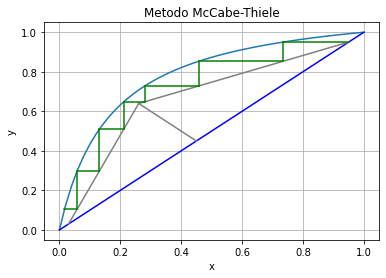

In [16]:
t=np.linspace(0,1,2)
plt.plot(x_graph2,y_graph2)
plt.plot(t,color='b')

plt.plot([xi,z],[yi,z], color='grey')
plt.plot([xi,xd],[yi,xd], color='grey')
plt.plot([xi,xb],[yi,xb], color='grey')
   
plt.plot([xy_rect[:,0],xy_c[:,0]],[xy_rect[:,1],xy_c[:,1]], color='g')
plt.plot([xy_c[:-1,0],xy_rect[1:,0]],[xy_c[:-1,1],xy_rect[1:,1]], color='g')

plt.title("Metodo McCabe-Thiele")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [20]:
print(f"El numero de platos de la torre de destilacion requeridos para la separacion es: {i}")

El numero de platos de la torre de destilacion requeridos para la separacion es: 7
